# Лабораторная работа №1 (Вариант 4)
**Решение нелинейных уравнений**

## Задание 
**Исследование функции f(x) и решение уравнения f(x) = 0.**

1. Нахождение промежутка, содержащего наименьший положительный корень уравнения f(x) = 0 для которого выполняются достаточные условия сходимости одного из итерационных методов.
2. Получение приближенного всеми указанными методами (с точностью 10-7).

Первый этап алгоритма может быть реализован следующим образом:
Задаются значения границ промежутка [a,b] и количество тoчек n.
Вычисляется таблица значений функции y = f(x) на промежутке [a,b] с шагом  и строится график функции.
По виду графика (и по значениям функции в таблице) подбираются границы промежутка так, чтобы он содержал корень уравнения.

Для некоторых методов находим выражения для первой и второй производной функции f(x).
Границы промежутка, содержащего корень, в случае необходимости корректируются так, чтобы на этом промежутке знаки первой и второй производной функции были постоянны.

$f(x)=e^{-x}-(x-1)^2$

## Импорт библиотек

In [407]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Этап 1
### Определение наименьшего положительного корня


**Функция и производные**

In [408]:
def func(x):
    return np.exp(-x) - (x - 1) ** 2


def derfunc(x):
    return -np.exp(-x) - 2 * x + 2


def dderfunc(x):
    return np.exp(-x) - 2


**Построение таблицы**

$[a,b]$ и $n$ ниже

In [409]:
a, b = 1, 2
n = 10

x_vals = np.linspace(a, b, n)
y_vals = func(x_vals)
dy_vals = derfunc(x_vals)
ddy_vals = dderfunc(x_vals)
y_list = [y_vals, dy_vals, ddy_vals]
f_df = pd.DataFrame({"x": x_vals, "y": y_vals})
display(f_df)

,x,y
0,1.000000,0.367879
1,1.111111,0.316847
2,1.222222,0.245192
3,1.333333,0.152486
4,1.444444,0.038346
5,1.555556,-0.097570
6,1.666667,-0.255569
7,1.777778,-0.435925
8,1.888889,-0.638884
9,2.000000,-0.864665


**Построение графика**

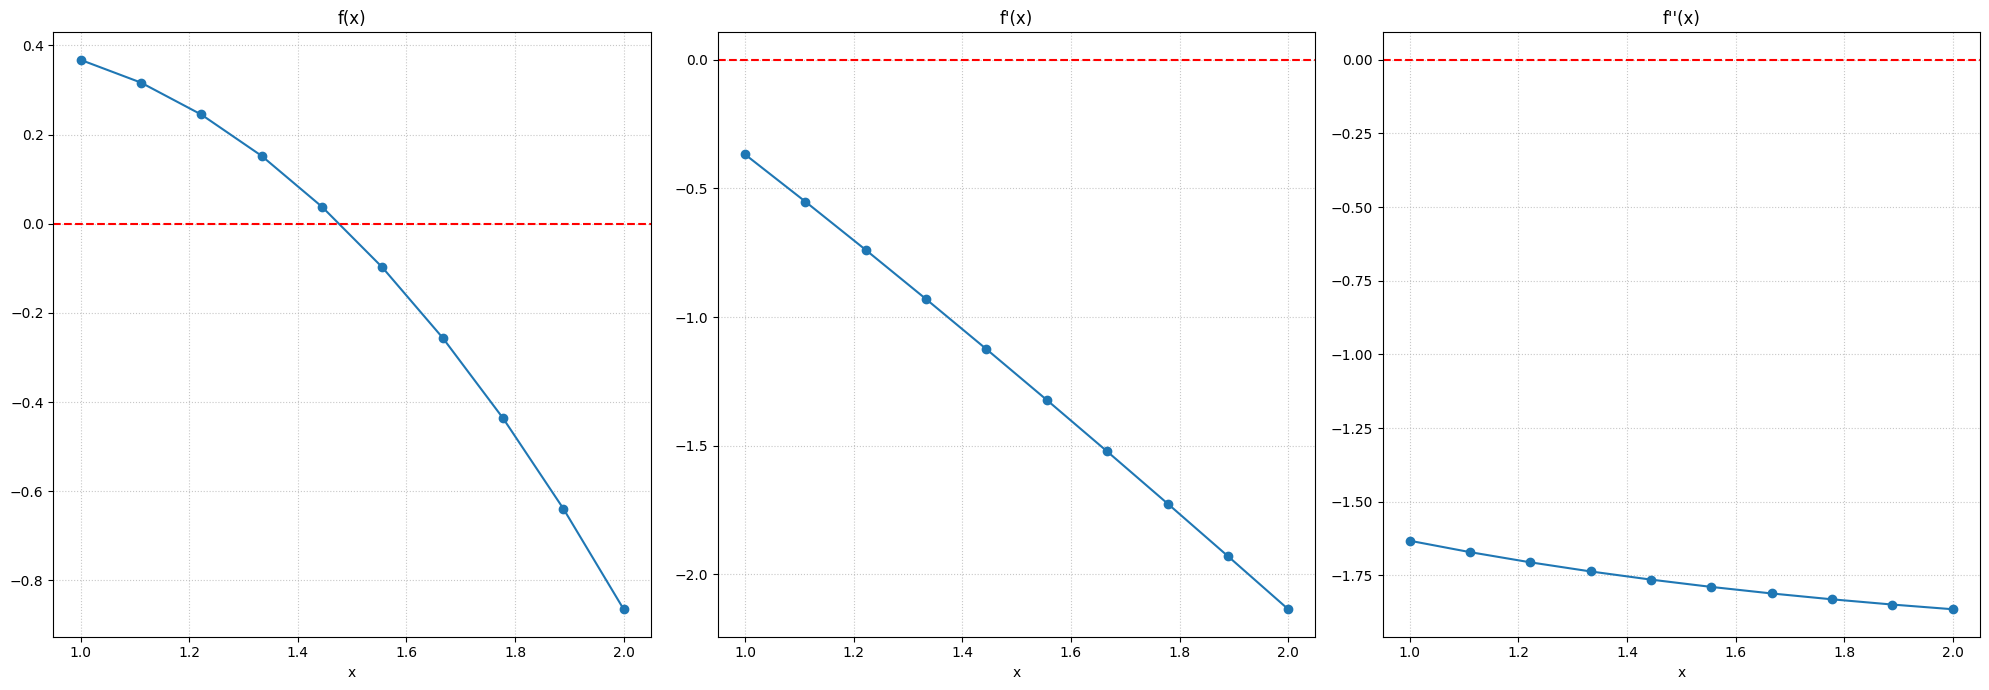

In [410]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
titles = ["f(x)", "f'(x)", "f''(x)"]
for ax, y, title in zip(axes, y_list, titles):
    ax.plot(x_vals, y, "o-")
    ax.axhline(0, color="r", ls="--")
    ax.grid(True, ls=":", alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel("x")
plt.tight_layout()
plt.show()

**Определение интервала с корнем**

In [411]:
sign_changes = np.where(np.diff(np.sign(y_vals)))[0]
if len(sign_changes) > 0:
    i = sign_changes[0]  # первый корень (наименьший положительный)
    a_corr, b_corr = x_vals[i], x_vals[i + 1]
    print(f"Корень находится между {a_corr:.7f} и {b_corr:.7f}")
else:
    print("На данном интервале корень не обнаружен.")

Корень находится между 1.4444444 и 1.5555556


**Проверка условий сходимости**

In [412]:
print(f"Знак f' на [{a}, {b}]: {np.all(dy_vals > 0) or np.all(dy_vals < 0)}")
print(f"Знак f'' на [{a}, {b}]: {np.all(ddy_vals > 0) or np.all(ddy_vals < 0)}")

Знак f' на [1, 2]: True
Знак f'' на [1, 2]: True


## Этап 2

In [413]:
def iteration_table(title, history):
    df = pd.DataFrame(history, columns=["k", "xk"])
    df["xk"] = df["xk"].map("{:.8f}".format)
    print(title)
    print(f"x0 = {history[0][1]:.8f}")
    display(df)
    return df

### Реализация методов

#### Метод Ньютона

In [414]:
def newton_method(f, df, ddf, a, b, eps=1e-7, max_iter=100):
    x0 = a if f(a) * ddf(a) > 0 else b
    history = [[0, x0]]
    xn = x0
    for it in range(1, max_iter + 1):
        xn_next = xn - f(xn) / df(xn)
        history.append([it, xn_next])
        if abs(xn_next - xn) < eps:
            break
        xn = xn_next
    return xn_next, history, it

#### Метод хорд

In [415]:
def chord_method(f, ddf, a, b, eps=1e-7, max_iter=100):
    if f(a) * ddf(a) > 0:
        fixed, x0 = a, b  # неподвижна левая граница
    else:
        fixed, x0 = b, a  # неподвижна правая граница
    history = [[0, x0]]
    xn = x0
    for it in range(1, max_iter + 1):
        f_fixed = f(fixed)
        f_xn = f(xn)
        xn_next = xn - (f_xn / (f_fixed - f_xn)) * (fixed - xn)
        history.append([it, xn_next])
        if abs(xn_next - xn) < eps:
            break
        xn = xn_next
    return xn_next, history, it

#### Метод секущих

In [416]:
def secant_method(f, a, b, eps=1e-7, max_iter=100):
    """Две начальные точки: a и b"""
    x_prev, x_curr = a, b
    history = [[0, x_prev], [1, x_curr]]
    for it in range(2, max_iter + 1):
        f_curr, f_prev = f(x_curr), f(x_prev)
        if f_curr == f_prev:
            break
        x_next = x_curr - f_curr * (x_curr - x_prev) / (f_curr - f_prev)
        history.append([it, x_next])
        if abs(x_next - x_curr) < eps:
            break
        x_prev, x_curr = x_curr, x_next
    return x_next, history, it

#### Метод конечноразност Ньютона

In [417]:
def finite_diff_newton(f, x0, h=1e-5, eps=1e-7, max_iter=100):
    history = [[0, x0]]
    xn = x0
    for it in range(1, max_iter + 1):
        df_approx = (f(xn + h) - f(xn)) / h
        xn_next = xn - f(xn) / df_approx
        history.append([it, xn_next])
        if abs(xn_next - xn) < eps:
            break
        xn = xn_next
    return xn_next, history, it

#### Метод Стеффенсена

In [418]:
def steffensen_method(f, x0, eps=1e-7, max_iter=100):
    history = [[0, x0]]
    xn = x0
    for it in range(1, max_iter + 1):
        fx = f(xn)
        denom = f(xn + fx) - fx
        if denom == 0:
            break
        xn_next = xn - (fx**2) / denom
        history.append([it, xn_next])
        if abs(xn_next - xn) < eps:
            break
        xn = xn_next
    return xn_next, history, it


#### Метод релаксации

In [419]:
def relaxation_method(f, df, a, b, eps=1e-7, max_iter=100):
    """Параметр τ = 2/(f'(a)+f'(b))"""
    tau = 2 / (df(a) + df(b))
    x0 = b  # начальное приближение – правая граница
    history = [[0, x0]]
    xn = x0
    for it in range(1, max_iter + 1):
        xn_next = xn - tau * f(xn)
        history.append([it, xn_next])
        if abs(xn_next - xn) < eps:
            break
        xn = xn_next
    return xn_next, history, it, tau

### Построение таблиц

In [420]:
# Параметры счёта
a = a_corr
b = b_corr
eps = 1e-7
max_iter = 100
h = 1e-5  # шаг для конечноразностного метода
summary = []

In [421]:
# 1. Ньютон
root, hist, it = newton_method(func, derfunc, dderfunc, a, b, eps)
iteration_table("МЕТОД НЬЮТОНА", hist)
summary.append(["Метод Ньютона", f"[{a:.3f}, {b:.3f}]", root, it])

МЕТОД НЬЮТОНА
x0 = 1.55555556


,k,xk
0,0,1.55555556
1,1,1.48176103
2,2,1.47768252
3,3,1.47767006
4,4,1.47767006


In [422]:
# 2. Хорды
root, hist, it = chord_method(func, dderfunc, a, b, eps)
iteration_table("МЕТОД ХОРД", hist)
summary.append(["Метод хорд", f"[{a:.3f}, {b:.3f}]", root, it])

МЕТОД ХОРД
x0 = 1.44444444


,k,xk
0,0,1.44444444
1,1,1.47579239
2,2,1.47756617
3,3,1.47766432
4,4,1.47766974
5,5,1.47767004
6,6,1.47767006


In [423]:
# 3. Секущие
root, hist, it = secant_method(func, a, b, eps)
iteration_table("МЕТОД СЕКУЩИХ", hist)
summary.append(["Метод секущих", f"[{a:.3f}, {b:.3f}]", root, it])

МЕТОД СЕКУЩИХ
x0 = 1.44444444


,k,xk
0,0,1.44444444
1,1,1.55555556
2,2,1.47579239
3,3,1.47756617
4,4,1.47767021
5,5,1.47767006
6,6,1.47767006


In [424]:
# 4. Конечноразностный Ньютон
root, hist, it = finite_diff_newton(func, b, h, eps)
iteration_table("КОНЕЧНОРАЗНОСТНЫЙ МЕТОД НЬЮТОНА", hist)
summary.append(["Конечноразностный Ньютона", f"[{a:.3f}, {b:.3f}]", root, it])

КОНЕЧНОРАЗНОСТНЫЙ МЕТОД НЬЮТОНА
x0 = 1.55555556


,k,xk
0,0,1.55555556
1,1,1.48176152
2,2,1.47768255
3,3,1.47767006
4,4,1.47767006


In [425]:
# 5. Стеффенсен
root, hist, it = steffensen_method(func, b, eps)
iteration_table("МЕТОД СТЕФФЕНСЕНА", hist)
summary.append(["Метод Стеффенсена", f"[{a:.3f}, {b:.3f}]", root, it])

МЕТОД СТЕФФЕНСЕНА
x0 = 1.55555556


,k,xk
0,0,1.55555556
1,1,1.47656782
2,2,1.47766990
3,3,1.47767006
4,4,1.47767006


In [426]:
# 6. Релаксация
root, hist, it, tau = relaxation_method(func, derfunc, a, b, eps)
print(f"\nПараметр релаксации τ = {tau:.6f}")
iteration_table("МЕТОД РЕЛАКСАЦИИ", hist)
summary.append(["Метод релаксации", f"[{a:.3f}, {b:.3f}]", root, it])


Параметр релаксации τ = -0.817344
МЕТОД РЕЛАКСАЦИИ
x0 = 1.55555556


,k,xk
0,0,1.55555556
1,1,1.47580736
2,2,1.47760670
3,3,1.47766799
4,4,1.47766999
5,5,1.47767006


In [427]:
df_final = pd.DataFrame(
    summary, columns=["Метод", "Интервал [a,b]", "Решение", "Итерации"]
)
df_final["Решение"] = df_final["Решение"].map("{:.8f}".format)
df_final

,Метод,"Интервал [a,b]",Решение,Итерации
0,Метод Ньютона,"[1.444, 1.556]",1.47767006,4
1,Метод хорд,"[1.444, 1.556]",1.47767006,6
2,Метод секущих,"[1.444, 1.556]",1.47767006,6
3,Конечноразностный Ньютона,"[1.444, 1.556]",1.47767006,4
4,Метод Стеффенсена,"[1.444, 1.556]",1.47767006,4
5,Метод релаксации,"[1.444, 1.556]",1.47767006,5
